In [2]:
import matplotlib.pyplot as plt
import os
from shutil import copyfile
import numpy as np
import pandas as pd
import astropy.constants as c
import astropy.units as u
import sys
import pyathena as pa
from scipy.interpolate import interp1d
from matplotlib.ticker import MultipleLocator
import copy
from mpl_toolkits import axes_grid1

from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
from matplotlib.colors import LogNorm
from six.moves import cPickle as pickle

class FixedOrderFormatter(ScalarFormatter):
    """Formats axis ticks using scientific notation with a constant order of 
    magnitude"""
    def __init__(self, order_of_mag=0, useOffset=True, useMathText=False):
        self._order_of_mag = order_of_mag
        ScalarFormatter.__init__(self, useOffset=useOffset, 
                                 useMathText=useMathText)
    def _set_orderOfMagnitude(self, range):
        """Over-riding this to avoid having orderOfMagnitude reset elsewhere"""
        self.orderOfMagnitude = self._order_of_mag

In [28]:
W = np.genfromtxt('./proj/Weight_No ICM.txt')
W_c = np.genfromtxt('./proj/Weight_c_No ICM.txt')
W_h = np.genfromtxt('./proj/Weight_h_No ICM.txt')
Pc = np.genfromtxt('./proj/Pc_No ICM.txt')
Pctu = np.genfromtxt('./proj/Pc_turb_No ICM.txt')
Pcth = np.genfromtxt('./proj/Pc_ther_No ICM.txt')
Pcmg = np.genfromtxt('./proj/Pc_mag_No ICM.txt')
Ph = np.genfromtxt('./proj/Ph_No ICM.txt')
Phtu = np.genfromtxt('./proj/Ph_turb_No ICM.txt')
Phth = np.genfromtxt('./proj/Ph_ther_No ICM.txt')
Phmg = np.genfromtxt('./proj/Ph_mag_No ICM.txt')

In [25]:
W_tot = np.add(W_c,W_h)
P_tot = np.add(Pc,Ph)

In [5]:
print W_tot.shape

(249L, 895L)


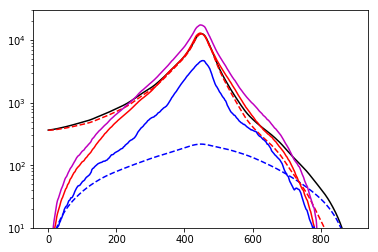

In [36]:
plt.semilogy(np.mean(W_tot,axis=0),c='k')
plt.semilogy(np.mean(W_c,axis=0),c='r',ls='--')
plt.semilogy(np.mean(W_h,axis=0),c='b',ls='--')
plt.plot(np.mean(P_tot,axis=0)-np.mean(P_tot,axis=0)[0],c='m')
plt.plot(np.mean(Pc,axis=0)-np.mean(Pc,axis=0)[0],c='r')
plt.plot(np.mean(Ph,axis=0)-np.mean(Ph,axis=0)[0],c='b')
#plt.plot(np.mean(Pc,axis=0),c='g')
#plt.plot(np.mean(Ph,axis=0),c='y')
plt.ylim(1e1,3e4)
plt.show()

In [5]:
print W_c[150]

[-2.70763867e+03 -2.70763858e+03 -2.70763846e+03 -2.70763830e+03
 -2.70763812e+03 -2.70763787e+03 -2.70763761e+03 -2.70763730e+03
 -2.70763708e+03 -2.70763698e+03 -2.70763697e+03 -2.70763697e+03
 -2.70763697e+03 -2.70763697e+03 -2.70763697e+03 -2.70763696e+03
 -2.70763690e+03 -2.70763674e+03 -2.70763642e+03 -2.70763590e+03
 -2.70763501e+03 -2.70763365e+03 -2.70763190e+03 -2.70762990e+03
 -2.70762775e+03 -2.70762550e+03 -2.70762325e+03 -2.70762132e+03
 -2.70762010e+03 -2.70761976e+03 -2.70761973e+03 -2.70761972e+03
 -2.70761971e+03 -2.70761968e+03 -2.70761965e+03 -2.70761963e+03
 -2.70761959e+03 -2.70761954e+03 -2.70761944e+03 -2.70761929e+03
 -2.70761906e+03 -2.70761868e+03 -2.70761800e+03 -2.70761720e+03
 -2.70761616e+03 -2.70761488e+03 -2.70761349e+03 -2.70761221e+03
 -2.70761107e+03 -2.70761011e+03 -2.70760944e+03 -2.70760905e+03
 -2.70760891e+03 -2.70760889e+03 -2.70760887e+03 -2.70760885e+03
 -2.70760884e+03 -2.70760881e+03 -2.70760878e+03 -2.70760873e+03
 -2.70760863e+03 -2.70760

In [6]:
print W_h[150]

[-4.96377661e+01 -4.91170972e+01 -4.85982436e+01 -4.80738313e+01
 -4.75414759e+01 -4.70079294e+01 -4.64720009e+01 -4.59403730e+01
 -4.54063616e+01 -4.48725341e+01 -4.43380328e+01 -4.38068080e+01
 -4.32768986e+01 -4.27401455e+01 -4.21985962e+01 -4.16503955e+01
 -4.11022486e+01 -4.05571436e+01 -4.00167740e+01 -3.94741464e+01
 -3.89366227e+01 -3.84029798e+01 -3.78686794e+01 -3.73297490e+01
 -3.67851690e+01 -3.62415323e+01 -3.56962371e+01 -3.51433583e+01
 -3.45799447e+01 -3.40023778e+01 -3.34254248e+01 -3.28571531e+01
 -3.22884643e+01 -3.17225653e+01 -3.11591703e+01 -3.05989771e+01
 -3.00477180e+01 -2.94938861e+01 -2.89379617e+01 -2.83736809e+01
 -2.78000462e+01 -2.72183120e+01 -2.66342068e+01 -2.60328474e+01
 -2.54195359e+01 -2.48055016e+01 -2.41882846e+01 -2.35672294e+01
 -2.29486801e+01 -2.23308592e+01 -2.17109107e+01 -2.10931316e+01
 -2.04762914e+01 -1.98670952e+01 -1.92760345e+01 -1.86940494e+01
 -1.81151931e+01 -1.75384529e+01 -1.69609472e+01 -1.63755028e+01
 -1.57894584e+01 -1.52034